<a href="https://colab.research.google.com/github/zzhining/data_visualization/blob/main/seaborn_stock_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 대시 보드 예시

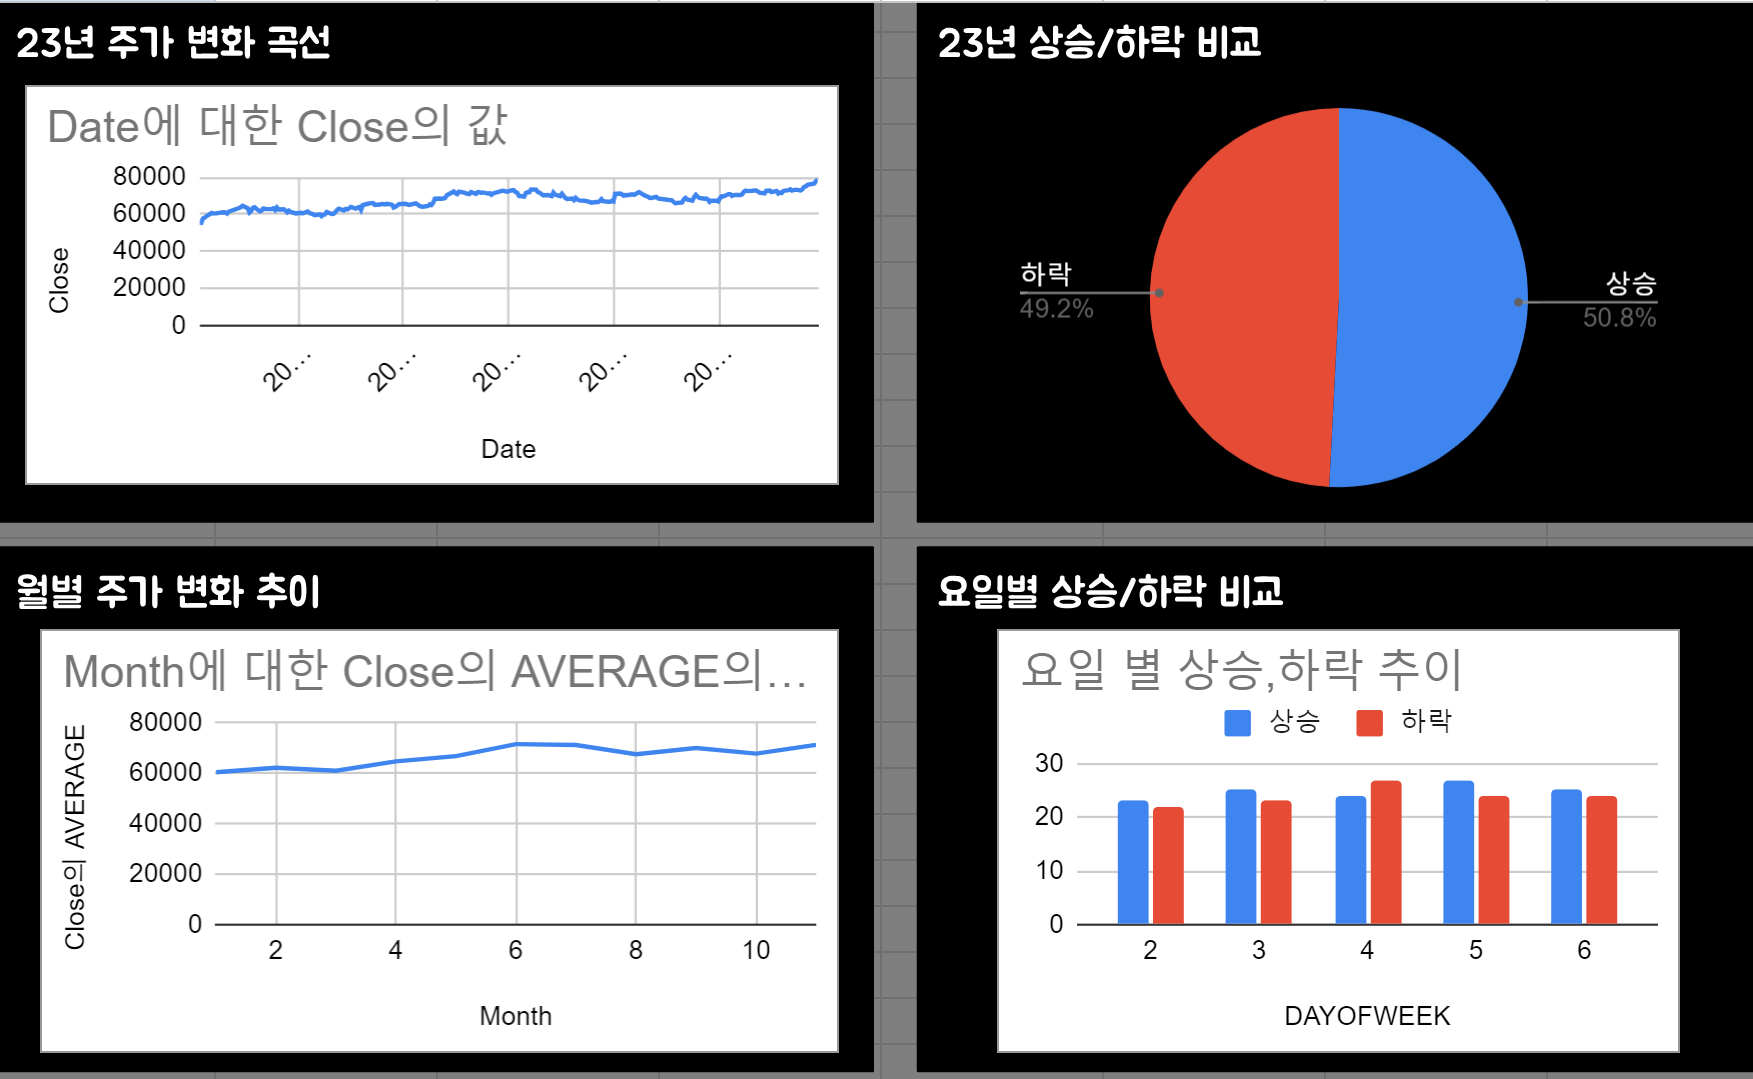

# 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
import yfinance as yfin
sns.set_palette('Set2')

yfin.pdr_override()

# 엔비디아, 2023년 1월1일~현재
df = data.get_data_yahoo('NVDA', start = '2023-01-01')
df.tail()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400
2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400
2024-06-18,131.139999,136.330002,130.690002,135.580002,135.580002,294335100
2024-06-20,139.800003,140.759995,129.520004,130.779999,130.779999,517768400
2024-06-21,127.120003,130.630005,124.300003,126.570000,126.570000,649445800


# 차트1) 종가 기준 선 그래프

<Axes: xlabel='Date', ylabel='Close'>

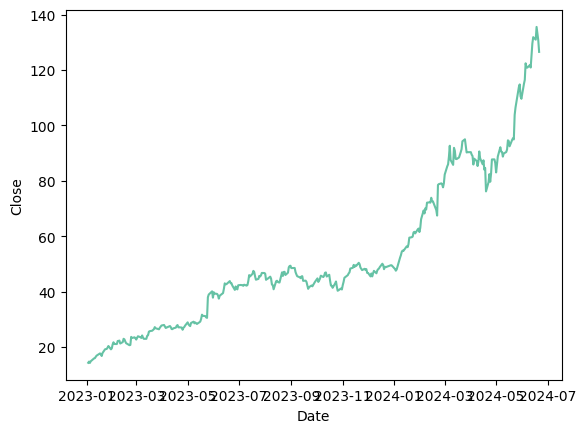

In [2]:
sns.lineplot(df['Close'])

# 차트2) 월별 종가 평균

In [3]:
df.reset_index(inplace = True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,14.851,14.996,14.096,14.315,14.306806,401277000
1,2023-01-04,14.567,14.853,14.241,14.749,14.740557,431324000
2,2023-01-05,14.491,14.564,14.148,14.265,14.256832,389168000
3,2023-01-06,14.474,15.010,14.034,14.859,14.850493,405044000
4,2023-01-09,15.284,16.056,15.141,15.628,15.619053,504231000


In [4]:
df['Date_Mon'] = df['Date'].apply(lambda x: str(x)[0:7])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_Mon
0,2023-01-03,14.851,14.996,14.096,14.315,14.306806,401277000,2023-01
1,2023-01-04,14.567,14.853,14.241,14.749,14.740557,431324000,2023-01
2,2023-01-05,14.491,14.564,14.148,14.265,14.256832,389168000,2023-01
3,2023-01-06,14.474,15.010,14.034,14.859,14.850493,405044000,2023-01
4,2023-01-09,15.284,16.056,15.141,15.628,15.619053,504231000,2023-01


In [5]:
df.groupby('Date_Mon')['Close'].mean()

Date_Mon
2023-01     17.273300
2023-02     22.042632
2023-03     25.107435
2023-04     27.149316
2023-05     31.056727
2023-06     40.921857
2023-07     44.762600
2023-08     45.253957
2023-09     44.324300
2023-10     43.635182
2023-11     47.531476
2023-12     48.070500
2024-01     56.259190
2024-02     72.550451
2024-03     89.442550
2024-04     85.703909
2024-05     96.220182
2024-06    124.933072
Name: Close, dtype: float64

<Axes: xlabel='Date_Mon', ylabel='Close'>

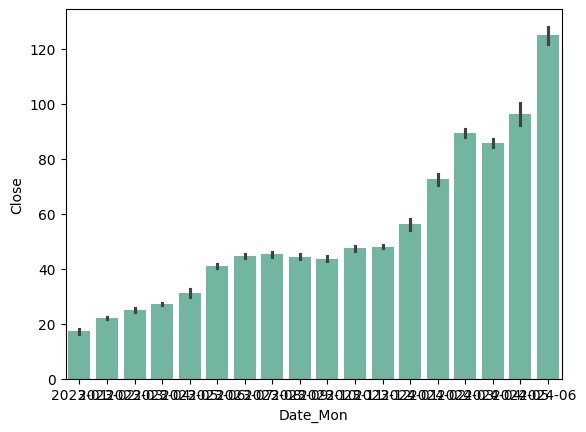

In [6]:
sns.barplot(x = 'Date_Mon', y = 'Close', data = df)

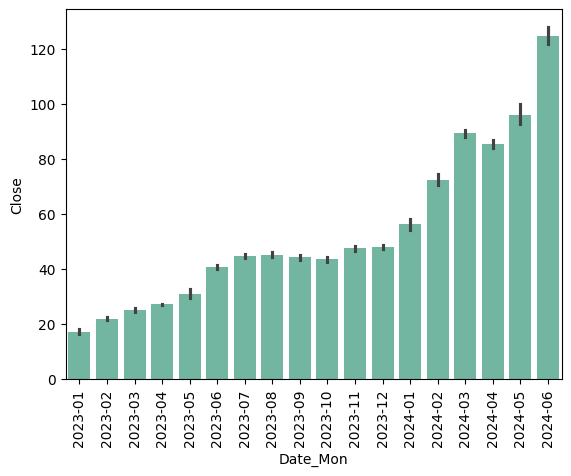

In [7]:
sns.barplot(x = 'Date_Mon', y = 'Close', data = df)
plt.xticks(rotation = 90)
plt.show()

# 차트3) 상승/하락 비교 파이차트

In [8]:
df['prev_Close'] = df['Close'].shift(1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_Mon,prev_Close
0,2023-01-03,14.851,14.996,14.096,14.315,14.306806,401277000,2023-01,NaN
1,2023-01-04,14.567,14.853,14.241,14.749,14.740557,431324000,2023-01,14.315
2,2023-01-05,14.491,14.564,14.148,14.265,14.256832,389168000,2023-01,14.749
3,2023-01-06,14.474,15.010,14.034,14.859,14.850493,405044000,2023-01,14.265
4,2023-01-09,15.284,16.056,15.141,15.628,15.619053,504231000,2023-01,14.859


In [9]:
df['Diff'] = df['prev_Close'] - df['Close']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_Mon,prev_Close,Diff
0,2023-01-03,14.851,14.996,14.096,14.315,14.306806,401277000,2023-01,NaN,NaN
1,2023-01-04,14.567,14.853,14.241,14.749,14.740557,431324000,2023-01,14.315,-0.434000
2,2023-01-05,14.491,14.564,14.148,14.265,14.256832,389168000,2023-01,14.749,0.483999
3,2023-01-06,14.474,15.010,14.034,14.859,14.850493,405044000,2023-01,14.265,-0.594000
4,2023-01-09,15.284,16.056,15.141,15.628,15.619053,504231000,2023-01,14.859,-0.769000


In [10]:
df.dropna(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_Mon,prev_Close,Diff
1,2023-01-04,14.567,14.853,14.241,14.749,14.740557,431324000,2023-01,14.315,-0.434000
2,2023-01-05,14.491,14.564,14.148,14.265,14.256832,389168000,2023-01,14.749,0.483999
3,2023-01-06,14.474,15.010,14.034,14.859,14.850493,405044000,2023-01,14.265,-0.594000
4,2023-01-09,15.284,16.056,15.141,15.628,15.619053,504231000,2023-01,14.859,-0.769000
5,2023-01-10,15.507,15.962,15.472,15.909,15.899893,384101000,2023-01,15.628,-0.281000


In [11]:
df['Diff_to_Prev'] = df['Diff'].apply(lambda x: 'Up' if x> 0 else 'Down')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_Mon,prev_Close,Diff,Diff_to_Prev
1,2023-01-04,14.567,14.853,14.241,14.749,14.740557,431324000,2023-01,14.315,-0.434000,Down
2,2023-01-05,14.491,14.564,14.148,14.265,14.256832,389168000,2023-01,14.749,0.483999,Up
3,2023-01-06,14.474,15.010,14.034,14.859,14.850493,405044000,2023-01,14.265,-0.594000,Down
4,2023-01-09,15.284,16.056,15.141,15.628,15.619053,504231000,2023-01,14.859,-0.769000,Down
5,2023-01-10,15.507,15.962,15.472,15.909,15.899893,384101000,2023-01,15.628,-0.281000,Down


In [12]:
df['Diff_to_Prev'].value_counts().index

Index(['Down', 'Up'], dtype='object', name='Diff_to_Prev')

In [13]:
df['Diff_to_Prev'].value_counts().values

array([214, 154])

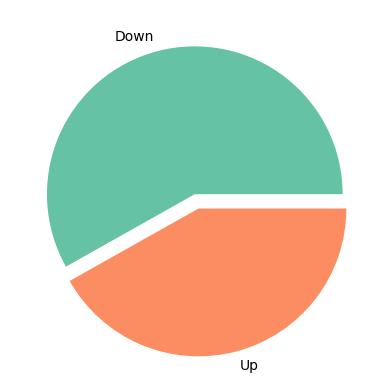

In [14]:
plt.pie(df['Diff_to_Prev'].value_counts().values, labels=df['Diff_to_Prev'].value_counts().index, explode=[0, 0.1]) # Create pie chart
plt.show() # Show chart

# 차트4) 요일별 상승/하락 비교

In [15]:
df['DayOfWeek'] = df['Date'].astype('datetime64[ns]').dt.dayofweek
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_Mon,prev_Close,Diff,Diff_to_Prev,DayOfWeek
1,2023-01-04,14.567,14.853,14.241,14.749,14.740557,431324000,2023-01,14.315,-0.434000,Down,2
2,2023-01-05,14.491,14.564,14.148,14.265,14.256832,389168000,2023-01,14.749,0.483999,Up,3
3,2023-01-06,14.474,15.010,14.034,14.859,14.850493,405044000,2023-01,14.265,-0.594000,Down,4
4,2023-01-09,15.284,16.056,15.141,15.628,15.619053,504231000,2023-01,14.859,-0.769000,Down,0
5,2023-01-10,15.507,15.962,15.472,15.909,15.899893,384101000,2023-01,15.628,-0.281000,Down,1


In [16]:
df['DayOfWeek'].value_counts()

DayOfWeek
2    76
3    76
4    75
1    75
0    66
Name: count, dtype: int64

<Axes: xlabel='DayOfWeek', ylabel='Close'>

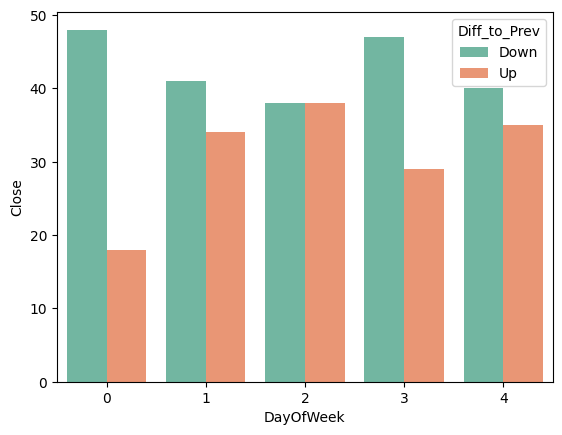

In [17]:
sns.barplot(x = df['DayOfWeek'], y = df['Close'], hue = df['Diff_to_Prev'], estimator = 'size')

# 차트 5) 전체

Text(0.5, 1.0, 'DayOfWeek Up/Down Ratio')

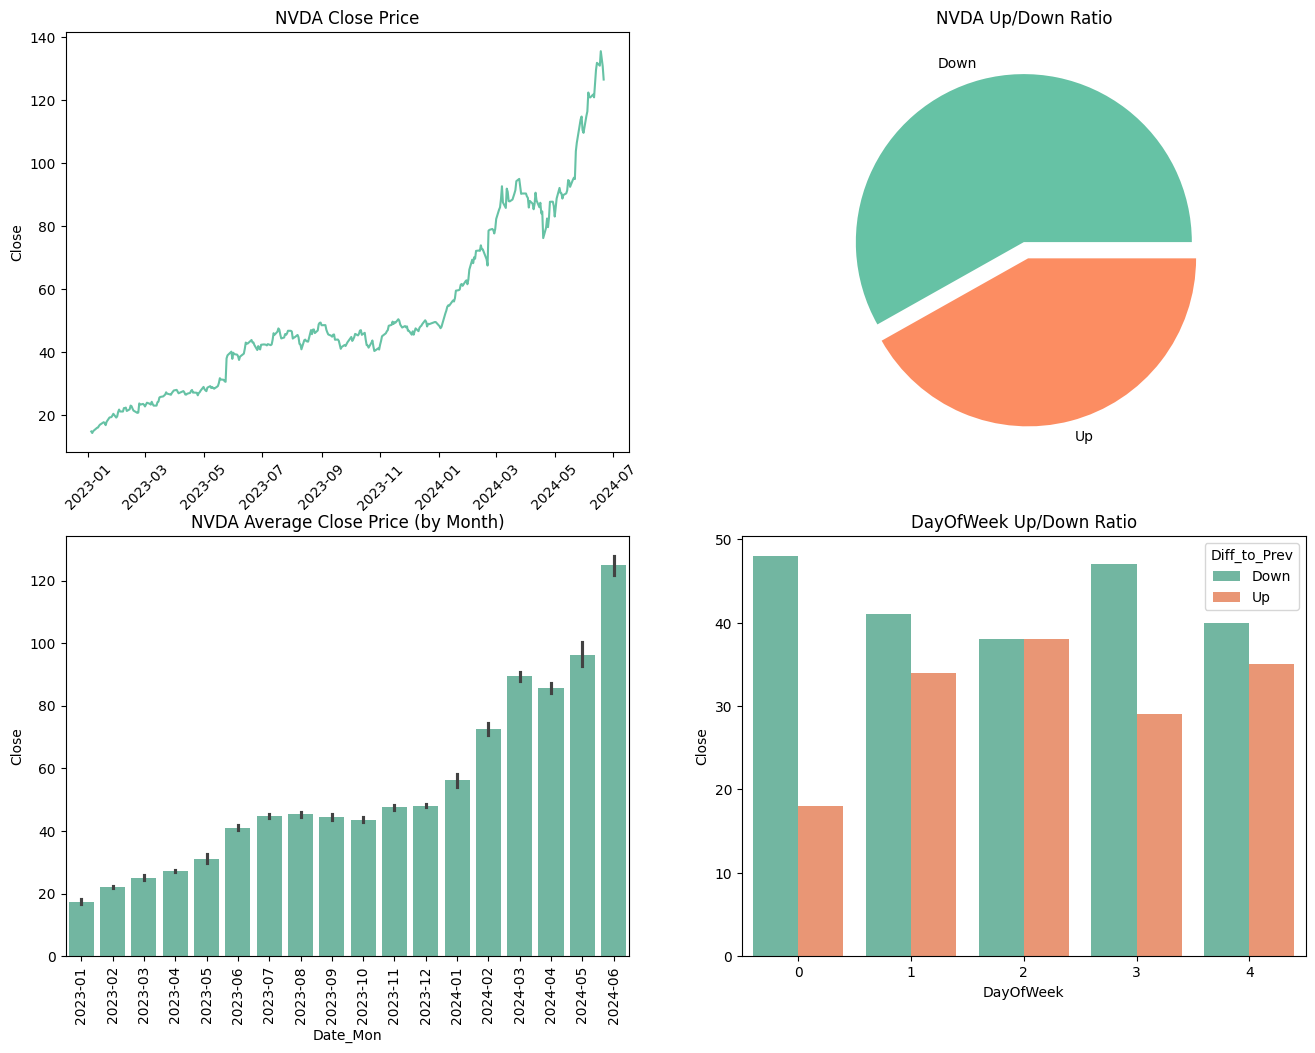

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16,12)

plt.subplot(2, 2, 1)
sns.lineplot(x= df['Date'], y=df['Close'])#, ax=ax[0][0])
plt.xticks(rotation = 45)
plt.title("NVDA Close Price")
plt.xlabel("")

plt.subplot(2, 2, 2)
plt.pie(df['Diff_to_Prev'].value_counts().values, labels=df['Diff_to_Prev'].value_counts().index, explode=[0, 0.1])
plt.title("NVDA Up/Down Ratio")

plt.subplot(2, 2, 3)
sns.barplot(x = 'Date_Mon', y = 'Close', data = df)
plt.xticks(rotation = 90)
plt.title("NVDA Average Close Price (by Month)")

plt.subplot(2, 2, 4)
sns.barplot(x = df['DayOfWeek'], y = df['Close'], hue = df['Diff_to_Prev'], estimator = 'size')
plt.title("DayOfWeek Up/Down Ratio")